In [1]:
import pyabf
import numpy as np
import matplotlib.pyplot as plt

In [11]:
with open("LFPs/Chronic(1)/МышиLFP/epi/pilo_pyr3_05022017.txt") as f:
    lines = f.readlines()

In [14]:
lines[-1]

'           .           .\n'

In [21]:
xs = [x for x in lines if x != '           .           .\n']

In [23]:
len(xs)

27764733

In [24]:
f = open('pilo_pyr3_05022017_clean.txt', 'w')
for item in xs:
    f.write(item)
f.close()

In [1]:
def CleanData(filename):
    with open(filename + ".txt") as f:
        lines = f.readlines()
    xs = [x for x in lines if x != '           .           .\n']
    f = open(filename + '_clean.txt', 'w')
    for item in xs:
        f.write(item)
    f.close()

In [7]:
CleanData("D:/Extreme Events/Epilepsy rats and mouses/LFPs/Chronic(1)/МышиLFP/epi/pilo_CD1_04022017")

In [8]:
CleanData("D:/Extreme Events/Epilepsy rats and mouses/LFPs/Chronic(1)/МышиLFP/epi/pilo_CD2_04022017")
CleanData("D:/Extreme Events/Epilepsy rats and mouses/LFPs/Chronic(1)/МышиLFP/epi/pilo_pyr1_04022017")
CleanData("D:/Extreme Events/Epilepsy rats and mouses/LFPs/Chronic(1)/МышиLFP/epi/pilo_pyr2_04022017")

In [2]:
a = np.loadtxt("D:/Extreme Events/Epilepsy rats and mouses/LFPs/Chronic(1)/МышиLFP/epi/pilo_CD1_04022017_clean.txt")

In [3]:
a.shape

(21723645, 2)

In [5]:
a[:, 1][::100].shape

(217237,)

In [16]:
a[:, 1][::100].shape[0] * 0.75

162927.75

In [4]:
data1 = np.loadtxt("D:/Extreme Events/Epilepsy rats and mouses/LFPs/Chronic(1)/МышиLFP/epi/pilo_CD2_04022017_clean.txt")


In [15]:
data1[:, 1][::100].shape

(360001,)

In [17]:
data1[:, 1][::100].shape[0] * 0.75

270000.75

In [20]:
data1.shape

(36000001, 2)

In [6]:
data2 = np.loadtxt("D:/Extreme Events/Epilepsy rats and mouses/LFPs/Chronic(1)/МышиLFP/epi/pilo_pyr1_04022017_clean.txt")


In [18]:
data2[:, 1][::100].shape[0] * 0.75

235449.75

In [13]:
data2[:, 1][::100].shape

(313933,)

In [7]:
data2.shape

(31393277, 2)

In [8]:
data3 = np.loadtxt("D:/Extreme Events/Epilepsy rats and mouses/LFPs/Chronic(1)/МышиLFP/epi/pilo_pyr2_04022017_clean.txt")


In [19]:
data3[:, 1][::100].shape[0] * 0.75

212409.75

In [14]:
data3[:, 1][::100].shape

(283213,)

In [9]:
data3.shape

(28321278, 2)

In [10]:
data4 = np.loadtxt("pilo_pyr3_05022017_clean.txt")


In [12]:
data4.shape

(27764733, 2)

In [20]:
data4[:, 1][::100].shape[0] * 0.75

208236.0

In [11]:
data4[:, 1][::100].shape

(277648,)

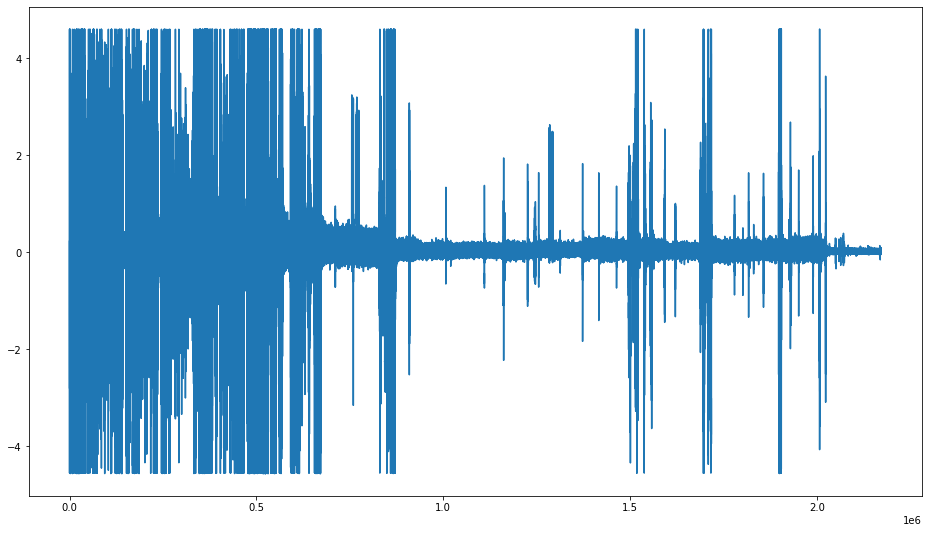

In [15]:
plt.figure(figsize=(16, 9))
plt.plot(a[:, 0], a[:, 1])

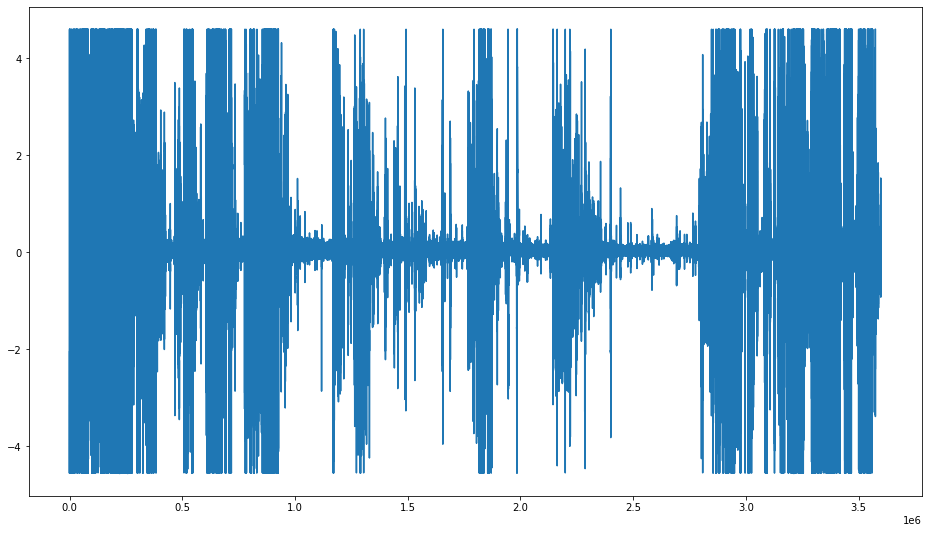

In [16]:
plt.figure(figsize=(16, 9))
plt.plot(data1[:, 0], data1[:, 1])

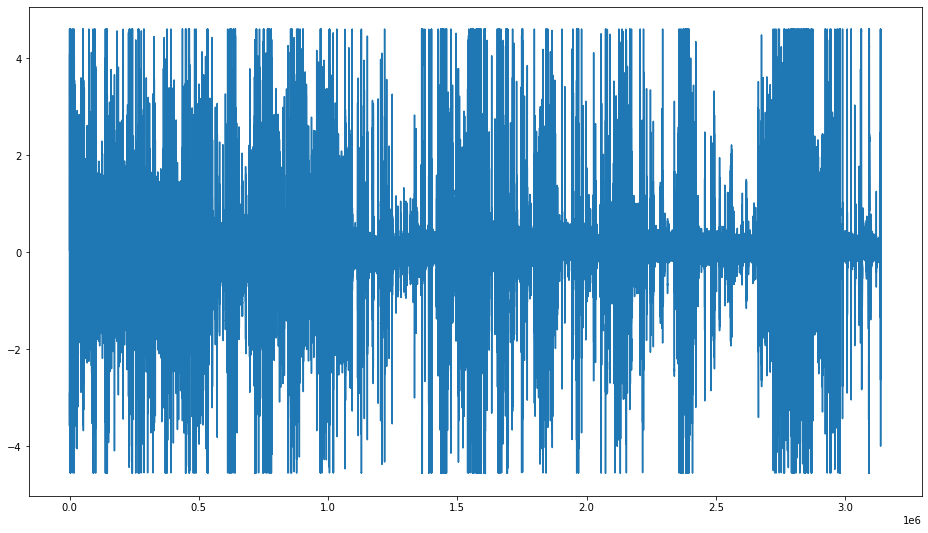

In [17]:
plt.figure(figsize=(16, 9))
plt.plot(data2[:, 0], data2[:, 1])

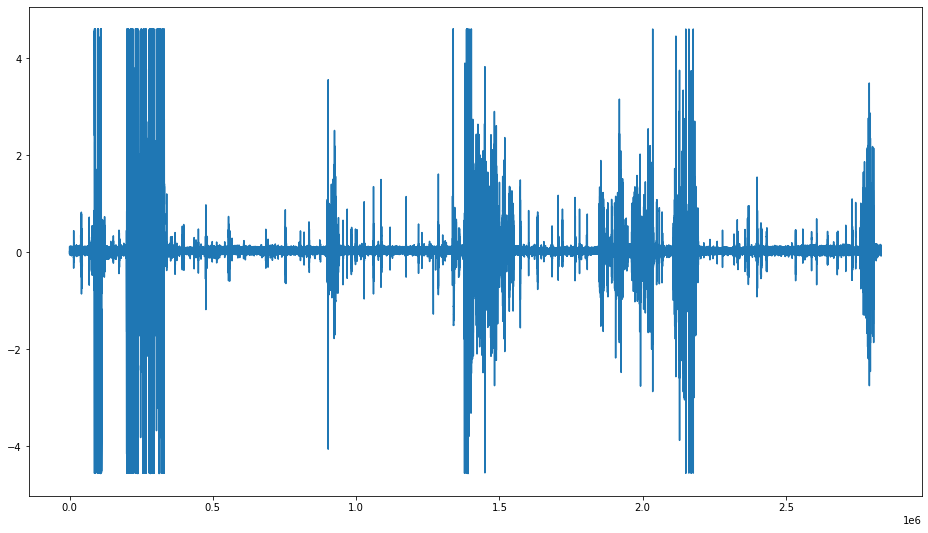

In [18]:
plt.figure(figsize=(16, 9))
plt.plot(data3[:, 0], data3[:, 1])

In [25]:
assert (a[:10, 0] == data1[:10, 0]).all()
assert (a[:10, 0] == data2[:10, 0]).all()
assert (a[:10, 0] == data3[:10, 0]).all()
assert (a[:10, 0] == data4[:10, 0]).all()

In [27]:
data = np.concatenate((a[:, 1][::100], data1[:, 1][::100], data2[:, 1][::100], data3[:, 1][::100], data4[:, 1][::100]))

In [33]:
np.save("all_epi_mice_data", data)

In [29]:
data.shape[0]//4

363008

In [31]:
data4[:, 1][::100].shape

(277648,)

In [3]:
a.shape

(27764733, 2)

In [4]:
data = a[:, 1][::100] 

In [14]:
data.shape[0]

277648

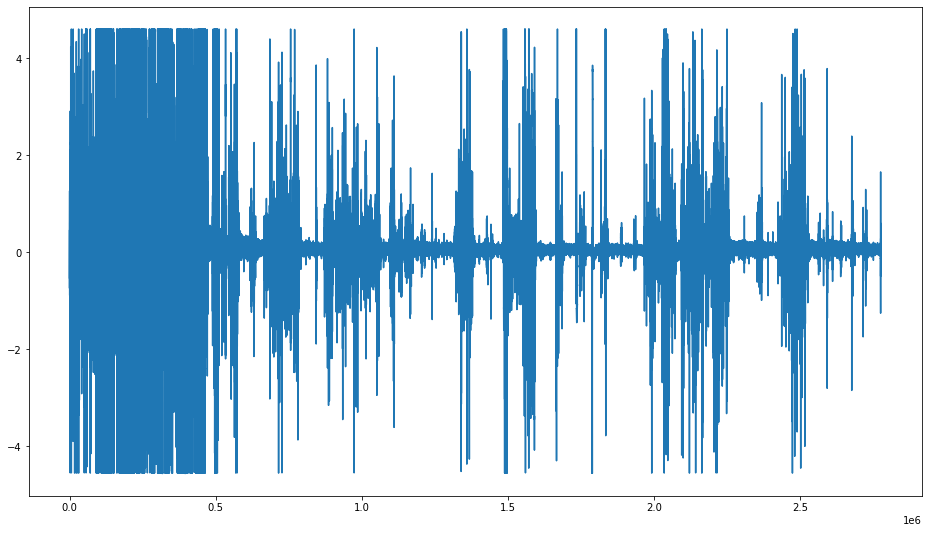

In [28]:
plt.figure(figsize=(16, 9))
plt.plot(a[:, 0], a[:, 1])

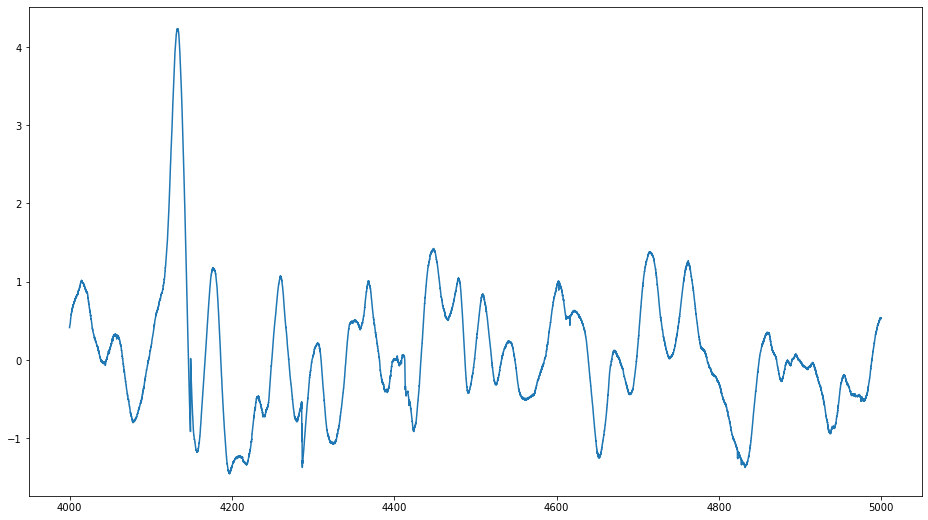

In [37]:
plt.figure(figsize=(16, 9))
plt.plot(a[:, 0][40000:50000], a[:, 1][40000:50000])

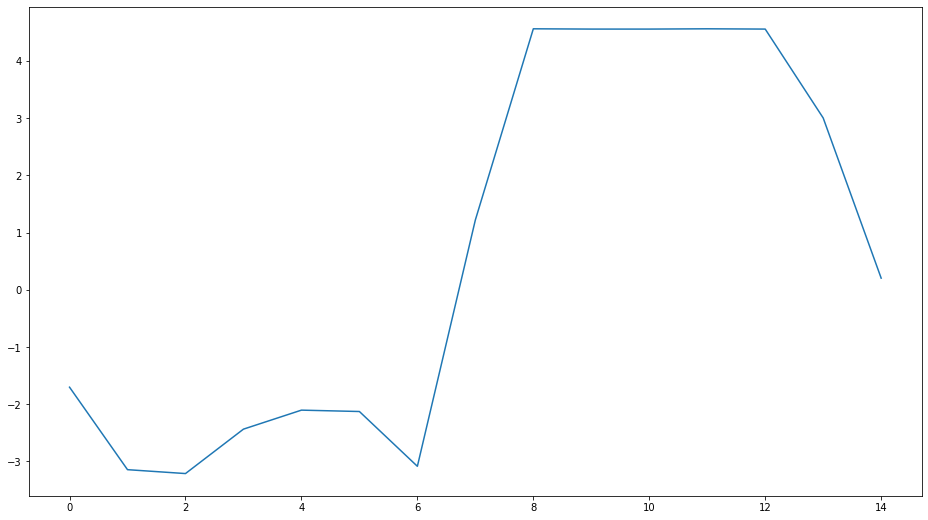

In [11]:
plt.figure(figsize=(16, 9))
plt.plot(data[1225:1240])

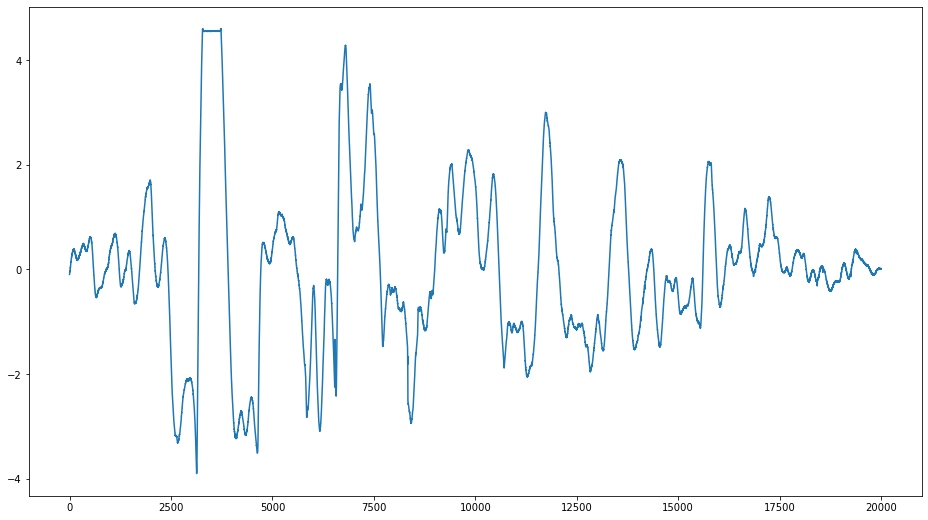

In [10]:
plt.figure(figsize=(16, 9))
plt.plot(a[:, 1][120000:140000])

In [5]:
mean = np.mean(a[:, 1])
std = np.std(a[:, 1])
Hs = mean + 4*std

In [6]:
(data > Hs).sum()

3824

In [28]:
cnt = 0
i = 20
idxs = []
sums = []
while i < len(data) - 20:
    if data[i] > Hs and (data[i: i + 50] > Hs).sum() > 1:
        idxs.append(i)
        sums.append((data[i: i + 50] > Hs).sum() - 1)
        i += 50
        cnt += 1
        
    i += 1
cnt

257

In [29]:
sums

[2,
 5,
 2,
 1,
 1,
 1,
 1,
 1,
 3,
 22,
 33,
 41,
 49,
 5,
 3,
 4,
 2,
 9,
 30,
 1,
 34,
 11,
 26,
 35,
 8,
 12,
 36,
 3,
 27,
 9,
 7,
 21,
 12,
 1,
 18,
 16,
 11,
 20,
 15,
 11,
 12,
 36,
 7,
 1,
 3,
 2,
 1,
 6,
 3,
 1,
 4,
 7,
 6,
 1,
 1,
 7,
 31,
 5,
 20,
 3,
 1,
 2,
 3,
 4,
 5,
 15,
 30,
 40,
 2,
 8,
 16,
 49,
 19,
 13,
 30,
 24,
 24,
 20,
 24,
 7,
 36,
 17,
 17,
 43,
 1,
 22,
 18,
 28,
 4,
 2,
 35,
 13,
 8,
 2,
 3,
 5,
 1,
 2,
 1,
 2,
 1,
 4,
 1,
 6,
 6,
 1,
 1,
 11,
 7,
 1,
 2,
 1,
 2,
 4,
 1,
 2,
 4,
 1,
 8,
 2,
 10,
 6,
 9,
 8,
 1,
 3,
 30,
 39,
 26,
 14,
 37,
 30,
 15,
 20,
 49,
 5,
 5,
 48,
 47,
 43,
 31,
 24,
 15,
 2,
 32,
 11,
 28,
 19,
 22,
 27,
 34,
 33,
 30,
 1,
 5,
 2,
 32,
 34,
 1,
 6,
 29,
 3,
 7,
 11,
 10,
 14,
 6,
 35,
 16,
 2,
 9,
 36,
 3,
 2,
 2,
 8,
 27,
 25,
 2,
 1,
 1,
 9,
 11,
 19,
 12,
 1,
 1,
 19,
 14,
 20,
 13,
 31,
 3,
 8,
 2,
 3,
 25,
 9,
 49,
 39,
 7,
 2,
 6,
 28,
 35,
 14,
 10,
 37,
 8,
 41,
 18,
 21,
 13,
 3,
 4,
 3,
 4,
 4,
 7,
 29,
 14,
 21,
 22,
 3

In [15]:
data[615:630]

array([-1.179, -1.179, -2.361, ..., -0.173, -1.096, -0.984])

In [12]:
Hs

3.5791122503726145

In [19]:
data[idxs[0] - 10:idxs[0] + 10]

array([-1.829, -2.   , -1.179, ...,  0.017, -0.076, -0.398])

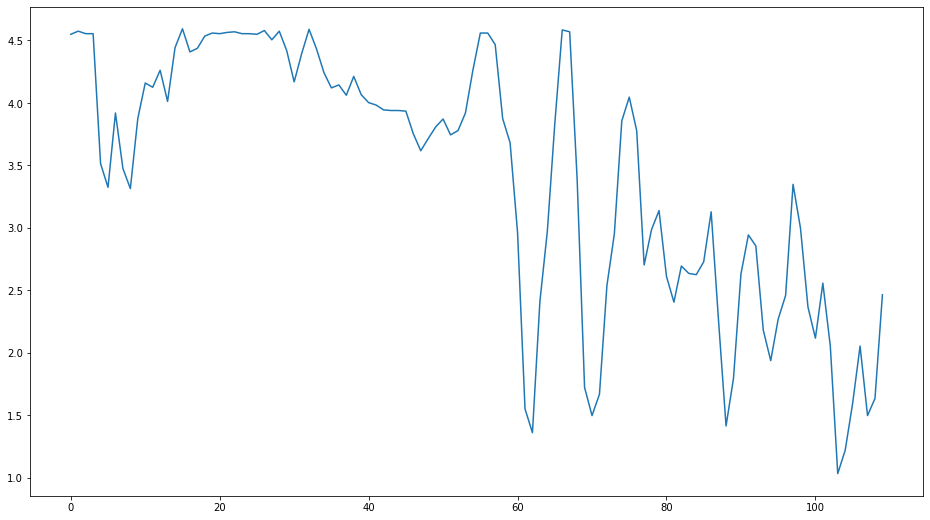

In [33]:
plt.figure(figsize=(16, 9))
plt.plot(data[idxs[12] - 10:idxs[12] + 100])